#LABORATORIO 3
Estudiante: Sheila Rojas Vasquez
Grupo de Laboratorio N°1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import numpy as np

from matplotlib import pyplot

from scipy import optimize
%matplotlib inline

El dataset utilizado es sobre la aprobación de préstamos bancarios en base a las características o X : Age, Experience, Income, Family, CCAvg, Education, Motgage, Securities.Account, CD.Account, Online, CreditCard
El target o Y es el Personal Loan que es 0 en caso de no otorgarse el crédito y 1 en caso de si otorgarse el préstamo.
Se tiene en total 5000  casos los cuales se distribuirán de manera que el 80% resulte para el entrenamiento y el 20%para la validación

#Entrenamiento

In [32]:

data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/machine learning/datasets/bankloan.csv', delimiter=',')
#Eliminamos etiquetas de la fila 1
#datos de entrenamienro del modelo total 5000 datos, 80% -> 4000 datos de entrenamiento
data=data[1:4001][:]
data


array([[1.000e+00, 2.500e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 4.500e+01, 1.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 3.900e+01, 1.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.998e+03, 6.200e+01, 3.800e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.999e+03, 3.400e+01, 1.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.000e+03, 4.700e+01, 2.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [33]:
#Variables de entrada
X=data
#Eliminamos id (0) , ZIP.code (4), Personal LOan (9)
X=np.delete(X,[0,4,9],axis=1)
print(X)
print(X[0])
X.size

[[25.  1. 49. ...  0.  0.  0.]
 [45. 19. 34. ...  0.  0.  0.]
 [39. 15. 11. ...  0.  0.  0.]
 ...
 [62. 38. 80. ...  0.  0.  0.]
 [34. 10. 41. ...  0.  0.  1.]
 [47. 21. 90. ...  0.  0.  0.]]
[25.   1.  49.   4.   1.6  1.   0.   1.   0.   0.   0. ]


44000

In [34]:
#Personal Loan o target indica 1 si se da el préstamo y 0 si no se da el préstamo a la persona
y=data[:,9]
print(y)
y.size

[0. 0. 0. ... 0. 0. 0.]


4000

In [37]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [38]:
X_norm, mu, sigma = featureNormalize(X)

In [39]:
#Funcion sigmoide
def sigmoid(z):
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [40]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [41]:
def calcularCosto(theta, X, y):
    m = y.size
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [42]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [43]:
X.shape

(4000, 12)

theta calculado por el descenso por el gradiente: [-3.57814564  0.0198751   0.05568358  1.75503004  0.56513497  0.27042554
  0.98592629  0.05586083 -0.20236514  0.68648257 -0.19062398 -0.33861655]


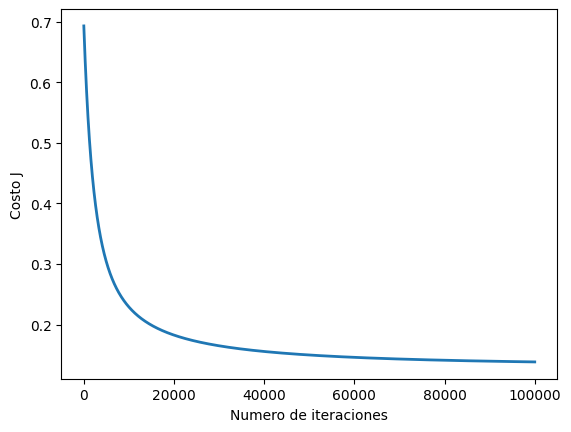

In [97]:

alpha = 0.001
num_iters = 100000

theta = np.zeros(12)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [98]:
#costo mínimo alcanzado
J_history[-1]

0.13857183667986953

theta calculado por el descenso por el gradiente: [-4.06438776  0.01419832  0.0862335   2.09764011  0.67494068  0.25654249
  1.18275165  0.04929056 -0.24539124  0.78800848 -0.24047452 -0.4174882 ]


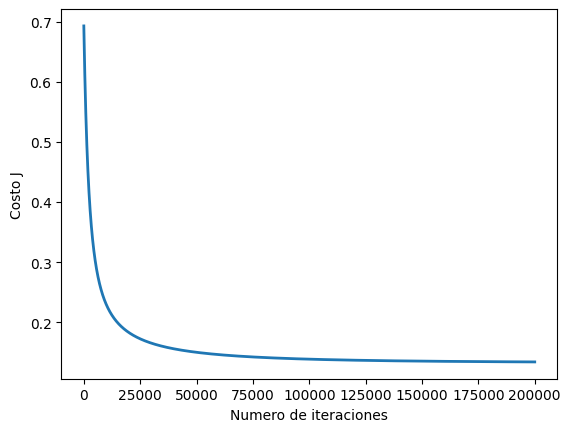

In [100]:

alpha = 0.001
num_iters = 200000

theta = np.zeros(12)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [102]:
#Costo mínimo alcanzado
J_history[-1]

0.13400421832524348

#Validación

In [103]:
# Cargar datos de validación 20% del total
data_ = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/machine learning/datasets/bankloan.csv', delimiter=',')
#Eliminamos etiquetas fila 1
data_=data_[4001:][:]
data_

array([[4.001e+03, 6.200e+01, 3.700e+01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [4.002e+03, 6.100e+01, 3.500e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.003e+03, 5.900e+01, 3.400e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [4.998e+03, 6.300e+01, 3.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.999e+03, 6.500e+01, 4.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+03, 2.800e+01, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00]])

In [104]:
X_=data_
#Eliminamos id (0) , ZIP.code (4), Personal LOan (9)
X_=np.delete(X_,[0,4,9],axis=1)
print(X_)


[[62. 37. 93. ...  1.  1.  1.]
 [61. 35. 81. ...  0.  0.  0.]
 [59. 34. 60. ...  0.  1.  0.]
 ...
 [63. 39. 24. ...  0.  0.  0.]
 [65. 40. 49. ...  0.  1.  0.]
 [28.  4. 83. ...  0.  1.  1.]]


In [105]:
m_=X_.shape[0]

In [106]:
X_norm_, mu_, sigma_ = featureNormalize(X_)

In [107]:
# Agraga el termino de intercepción a A
X_ = np.concatenate([np.ones((m_, 1)), X_norm_], axis=1)

In [108]:
print(X_[1])

[ 1.          1.37882724  1.30428351  0.19417299  1.4292735   0.00558415
  0.11450732 -0.51795303 -0.32587527 -0.25709547 -1.23501114 -0.66714819]


In [109]:
y_=data_[:,9]
print(y_)
y_.size

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

1000

In [110]:
X_.shape[0]

1000

In [111]:
def predict(theta, X_):

    m = X_.shape[0]

    p = np.zeros(m)

    p = np.round(sigmoid(X_.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [112]:
p = predict(theta, X_)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_) * 100))

Precisión de entrenamiento: 95.60 %
